In [1]:
#importing all the needed packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import blackman

In [2]:
#importing raw data
samplerate, data = wavfile.read("Test 1.wav")
#samplerate, data = wavfile.read("440-519Hz.wav")
data = data.transpose()
print("Samplerate: {}".format(samplerate))
samples = len(data[0])
print("Samples: {}".format(samples))

#calculating length (in seconds) of audio file
length = samples / samplerate
print("Length (in seconds): {:.4f}".format(length))

Samplerate: 44100
Samples: 346112
Length (in seconds): 7.8483


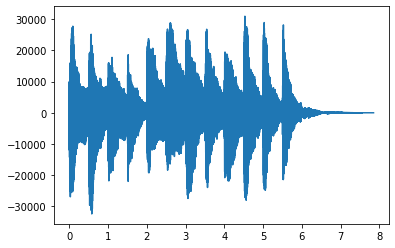

In [3]:
#plotting audio file
time = np.linspace(0,length,samples)
plt.plot(time,data[0])

(0, 0.3)

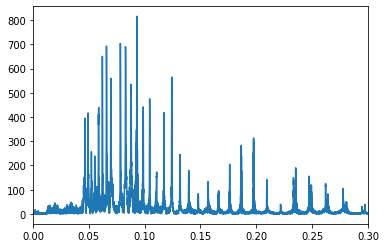

In [4]:
#Fourier Transforms
yft = fft(data[0])
xft = np.linspace(0,length/2,samples//2)

#Plotting Fourier Transforms
plt.plot(xft,2.0/samples * np.abs(yft[0:samples//2]))
plt.xlim(0,0.3)

There's a lot of noise so let's normalize the data to reduce spectral leakage

(0, 0.3)

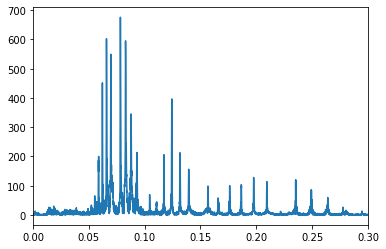

In [5]:
#Creating Normalized Data
window = blackman(samples)
yftW = fft(data[0]*window)

#plotting normalized data
plt.plot(xft,2.0/samples * np.abs(yftW[0:samples//2]))
plt.xlim(0,0.3)

That looks a bit better :)

Next we will slice up the audio file into pieces so that each piece contains only 1 note (this is taking advantage of the fact that the audio is monophonic and follows a set rythm)

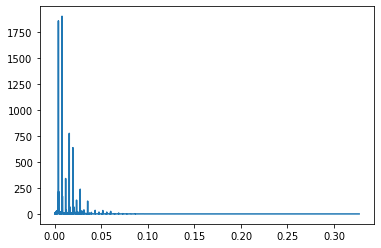

In [6]:
#isolating the first note
N = 12 #there are 12 notes all at even intervals
section = int(samples / N) 
section_window = blackman(section)
note1 = fft(data[0][0:section]*section_window)

#creating array for x-axis and plotting
xn = np.linspace(0,section/(2*samplerate),section//2)
plt.plot(xn, 2.0/section * np.abs(note1[0:section//2]))

By dividing the total number of samples by N and then taking the int of that 
value, we can hypothetically lose up to N-1 samples on the tail end of the audio
file. Currently with a sample rate of 44100, and an N of size 12, that loss is 
negligible

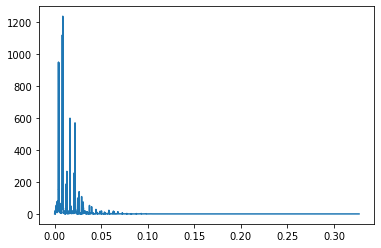

In [7]:
#isolating the second note
note2 = fft(data[0][section:2*section]*section_window)

#plotting
plt.plot(xn, 2.0/section * np.abs(note2[0:section//2]))

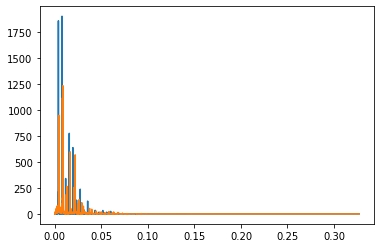

In [8]:
#overlaying 1st and 2nd note
plt.plot(xn, 2.0/section * np.abs(note1[0:section//2]))
plt.plot(xn, 2.0/section * np.abs(note2[0:section//2]))

Sanity check cleared, now to generalize this process into a for loop

In [9]:
notes = [] #creating an array to hold all the data for the notes
for i in range(N):
    ft = fft(data[0][section*i:(i+1)*section]*section_window) 
    notes.append(ft)

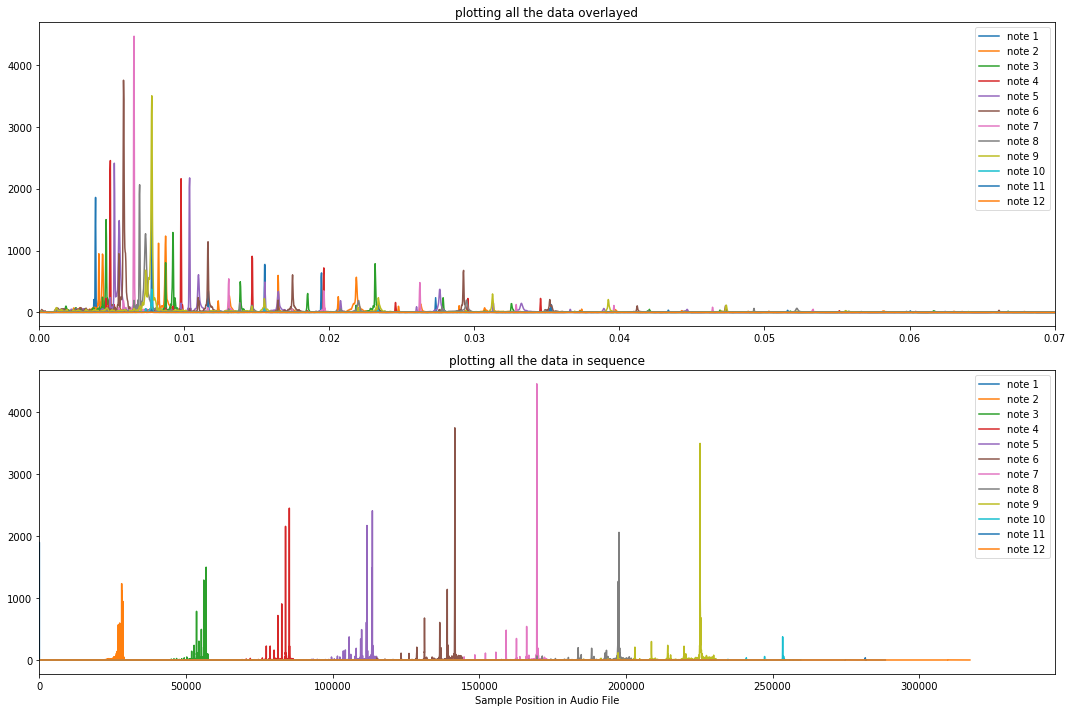

In [10]:
#plotting notes

#overlayed
fig1, (ax1, ax2) = plt.subplots(2,1,figsize=(15,10))
ax1.set_title("plotting all the data overlayed")
labels = []
for i in range(len(notes)):
    labels.append("note " + str(i+1) )
    ax1.plot(xn, 2.0/section * np.abs(notes[i][0:section//2]))
    
ax1.legend(labels, loc="upper right", framealpha=0.7)
ax1.set_xlim(0,0.07)


#sequential
ax2.set_title("plotting all the data in sequence")
labels2 = []

for i in range(len(notes)):
    xfn = np.linspace(i*section,(i+1)*section/(2*samplerate),section//2)
    labels2.append("note " + str(i+1) )
    ax2.plot(xfn, 2.0/section * np.abs(notes[i][0:section//2]))
    
ax2.legend(labels2, loc="upper right", framealpha=0.7)
ax2.set_xlabel("Sample Position in Audio File")
ax2.set_xlim(0,samples)

fig1.tight_layout()

Notes 11 and 12 don't appear very clearly so here is a graph of just those two

(250000, 346112)

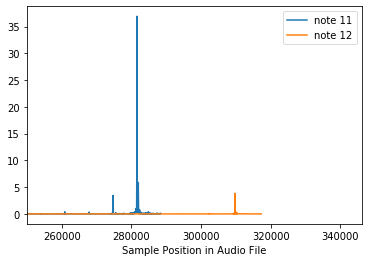

In [11]:
labels3 = []
for i in range(10,len(notes)):
    xfn = np.linspace(i*section,(i+1)*section/(2*samplerate),section//2)
    labels3.append("note " + str(i+1) )
    plt.plot(xfn, 2.0/section * np.abs(notes[i][0:section//2]))
    
plt.legend(labels3, loc="upper right", framealpha=0.7)
plt.xlabel("Sample Position in Audio File")
plt.xlim(250000,samples)

Looks like more of the sample was lost then expected, will have to adjust for that; as well, the windowing seems to be drasticlaly impacting the later notes, something that will have to be addressed

I realize now that my blunder was not realizing that the intervals the notes play at are not described by the total length/12 as there is a tail end to the audio file which lengthens it... 

now to try cutting up the audio file at a finer rate

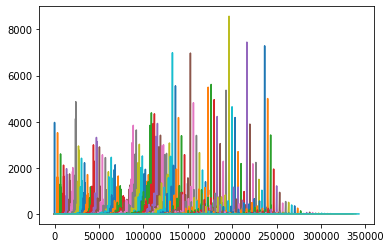

In [24]:
accuracy = 100


Piece = int(samples / accuracy) 
Piece_Window = blackman(Piece)


Notes = [] #creating an array to hold all the data for the notes
for i in range(accuracy):
    ft = fft(data[0][Piece*i:(i+1)*Piece]*Piece_Window) 
    Notes.append(ft)

#label = []

for i in range(len(Notes)):
    xfn = np.linspace(i*Piece,(i+1)*Piece/(2*samplerate),Piece//2)
    #label.append("note " + str(i+1) )
    plt.plot(xfn, 2.0/Piece * np.abs(Notes[i][0:Piece//2]))

#plt.legend(label, loc="upper right", framealpha=0.7)

Testing with a higher accuracy value

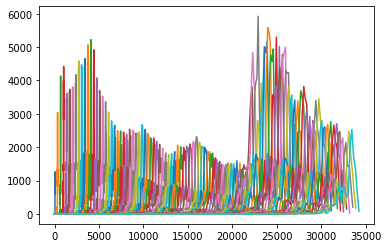

In [26]:
accuracy2 = 1000


Piece2 = int(samples / accuracy2) 
Piece_Window2 = blackman(Piece2)


Notes2 = [] #creating an array to hold all the data for the notes
for i in range(accuracy):
    ft = fft(data[0][Piece2*i:(i+1)*Piece2]*Piece_Window2) 
    Notes2.append(ft)

#label = []

for i in range(len(Notes2)):
    xfn2 = np.linspace(i*Piece2,(i+1)*Piece2/(2*samplerate),Piece2//2)
    #label.append("note " + str(i+1) )
    plt.plot(xfn2, 2.0/Piece2 * np.abs(Notes2[i][0:Piece2//2]))

#plt.legend(label, loc="upper right", framealpha=0.7)

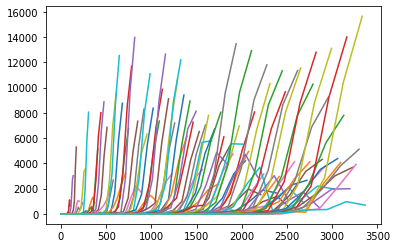

In [27]:
accuracy3 = 10000


Piece3 = int(samples / accuracy3) 
Piece_Window3 = blackman(Piece3)


Notes3 = [] #creating an array to hold all the data for the notes
for i in range(accuracy):
    ft = fft(data[0][Piece3*i:(i+1)*Piece3]*Piece_Window3) 
    Notes3.append(ft)

#label = []

for i in range(len(Notes3)):
    xfn3 = np.linspace(i*Piece3,(i+1)*Piece3/(2*samplerate),Piece3//2)
    #label.append("note " + str(i+1) )
    plt.plot(xfn3, 2.0/Piece3 * np.abs(Notes3[i][0:Piece3//2]))

#plt.legend(label, loc="upper right", framealpha=0.7)

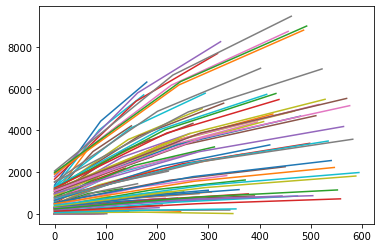

In [29]:
accuracy3 = 50000


Piece3 = int(samples / accuracy3) 
Piece_Window3 = blackman(Piece3)


Notes3 = [] #creating an array to hold all the data for the notes
for i in range(accuracy):
    ft = fft(data[0][Piece3*i:(i+1)*Piece3]*Piece_Window3) 
    Notes3.append(ft)

#label = []

for i in range(len(Notes3)):
    xfn3 = np.linspace(i*Piece3,(i+1)*Piece3/(2*samplerate),Piece3//2)
    #label.append("note " + str(i+1) )
    plt.plot(xfn3, 2.0/Piece3 * np.abs(Notes3[i][0:Piece3//2]))

#plt.legend(label, loc="upper right", framealpha=0.7)